Monter google drive dans colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls /content

ls: cannot access '/content/runs': Transport endpoint is not connected
book-spine-detection-1/  drive/  runs/  sample_data/  yolov8n.pt


In [ ]:
import cv2

image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio2.png")
image = cv2.resize(image, (800, 600))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(blurred)

cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio2_pretraitement.jpg", enhanced)


True

In [ ]:
import cv2
import numpy as np
import math

# === Chargement de l'image prétraitée ===
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio2.png")
output = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 150)

# === Détection des contours ===
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# === Boucle sur les contours ===
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    # On garde les quadrilatères (4 côtés) et de taille suffisante
    if len(approx) == 4 and cv2.contourArea(cnt) > 1000:
        # Option : vérifier si c’est un polygone convexe
        if cv2.isContourConvex(approx):
            cv2.drawContours(output, [approx], -1, (0, 255, 0), 2)

# === Sauvegarde du résultat ===
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio2_tranches_detectees.jpg", output)


True

In [ ]:
!pip install supervision
!pip install autodistill-grounded-sam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 854.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install autodistill autodistill-grounded-sam


In [ ]:
!pip install roboflow


In [ ]:
import cv2
import numpy as np
import supervision as sv
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM

# === Charger l'image ===
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio2.png")  # ou ton image locale

# === Initialiser GroundedSAM avec "book spine" comme classe ciblée ===
base_model = GroundedSAM(
    ontology=CaptionOntology({"book spine": "book spine"}),
    box_threshold=0.1
)

# === Prédiction : retourne un objet avec .mask, .xyxy, etc. ===
results = base_model.predict(image)

# === Convertir les masques en bounding boxes (xyxy) ===
xyxys = sv.mask_to_xyxy(masks=results.mask)

# === Extraire chaque tranche détectée ===
tranches = []

for mask in results.mask:
    masked_region = np.zeros_like(image)
    masked_region[mask] = image[mask]
    tranches.append(masked_region)

# === (Optionnel) Sauvegarder les tranches en fichiers individuels ===
for i, tranche in enumerate(tranches):
    cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio2_tranche_{i}.jpg", tranche)


Importing from timm.models.layers is deprecated, please import via timm.layers


trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)


final text_encoder_type: bert-base-uncased



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


In [ ]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio3.png")
# === Prédiction : retourne un objet avec .mask, .xyxy, etc. ===
results = base_model.predict(image)

# === Convertir les masques en bounding boxes (xyxy) ===
xyxys = sv.mask_to_xyxy(masks=results.mask)

# === Extraire chaque tranche détectée ===
tranches = []

for mask in results.mask:
    masked_region = np.zeros_like(image)
    masked_region[mask] = image[mask]
    tranches.append(masked_region)

# === (Optionnel) Sauvegarder les tranches en fichiers individuels ===
for i, tranche in enumerate(tranches):
    cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio3_tranche_{i}.jpg", tranche)

**09 mai 2025 :**

Dataset pour la detection de tranches de livres : https://universe.roboflow.com/koteitan/book-spine-detection-2cci9




In [ ]:
!pip install ultralytics
from ultralytics import YOLO


Étape 2 — Charger ton dataset (depuis Roboflow)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IEOtnnS8di9flBkTkxxo")
project = rf.workspace("koteitan").project("book-spine-detection-2cci9")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Étape 3 — Entraîner YOLOv8

In [ ]:
%rm -rf /content/runs

ls: cannot access '/content/runs': Transport endpoint is not connected
book-spine-detection-1/  drive/  runs/  sample_data/  yolov8n.pt


In [ ]:

# Entraîner le modèle
model = YOLO("yolov8n.pt")
results = model.train(data="/content/book-spine-detection-1/data.yaml", epochs=20)#attention sur le chemin


Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


OSError: [Errno 107] Transport endpoint is not connected: 'runs/detect/train'

In [ ]:
%ls /content/runs/detect/train3/weights/best_saved_model/

ls: cannot access '/content/runs/detect/train3/weights/best_saved_model/': No such file or directory


In [ ]:
%ls /content/runs

MyDrive/


In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# Charger le modèle YOLOv8 entraîné (fichier .pt)
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Lancer la prédiction sur une image du dossier valid/
results = model.predict(source="/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio1.jpg", save=True, conf=0.25)

# Afficher un résultat
display(Image(filename=results[0].path))

for r in results:
    print("Image :", r.path)
    for box in r.boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        print(f"→ classe: {cls}, confiance: {conf:.2f}")





ModuleNotFoundError: No module named 'ultralytics'

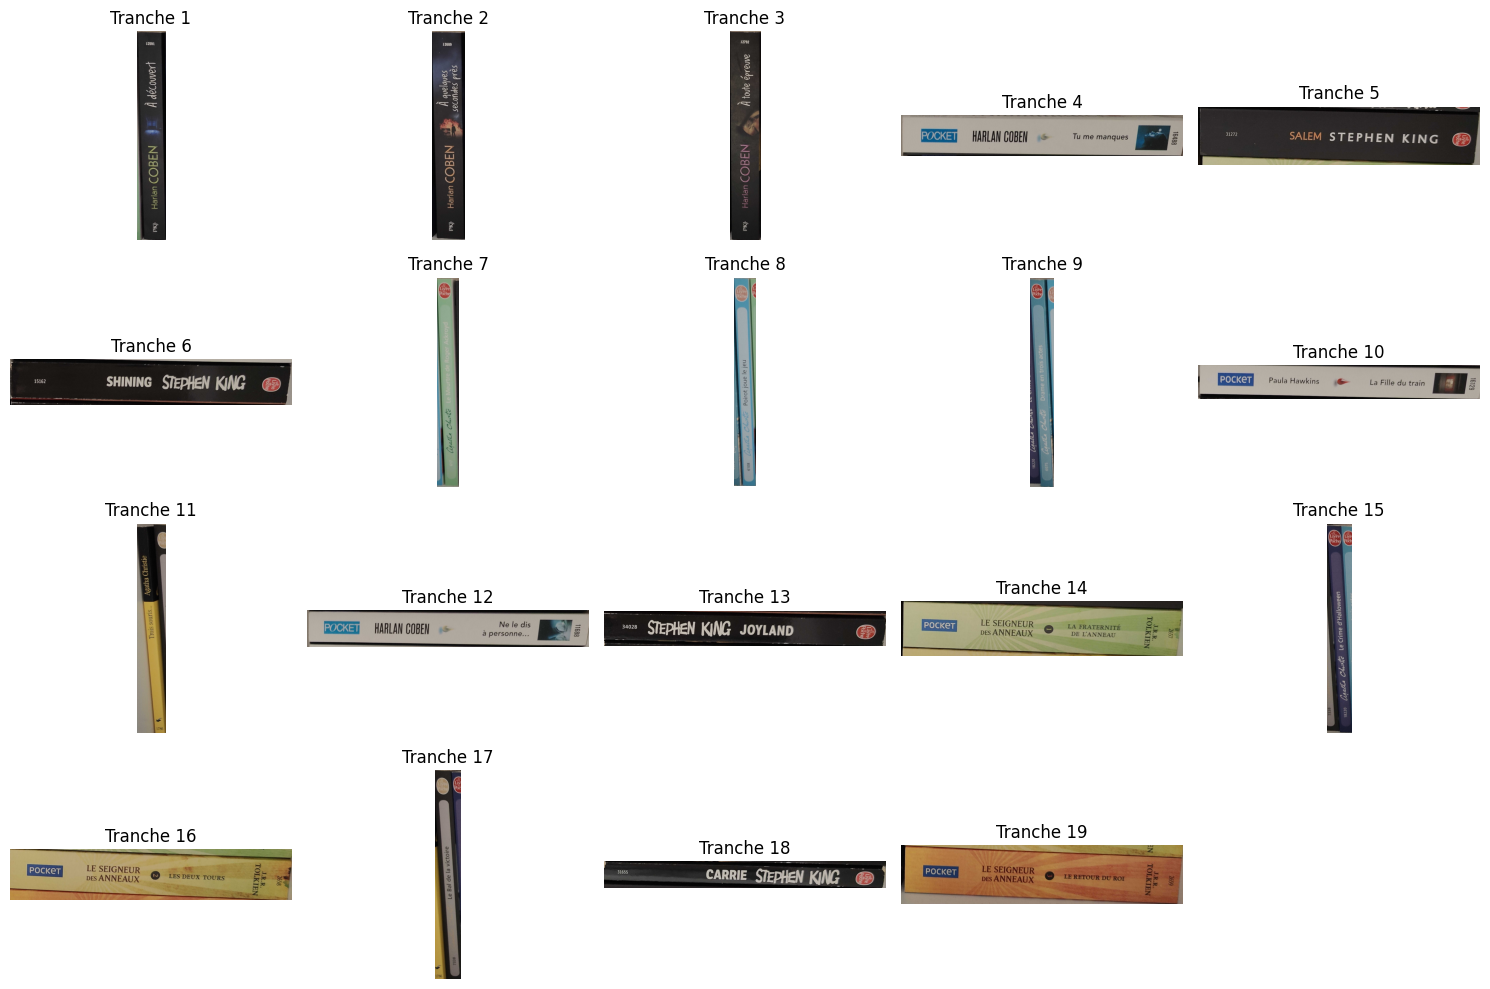

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Recharger l'image originale
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape

# Extraire les boîtes depuis results
boxes = results[0].boxes

# Afficher les tranches détectées
plt.figure(figsize=(15, 10))

for i, box in enumerate(boxes):
    xyxy = box.xyxy[0].cpu().numpy().astype(int)  # x1, y1, x2, y2
    x1, y1, x2, y2 = xyxy
    crop = image[y1:y2, x1:x2]

    # Afficher la tranche
    plt.subplot(4, 5, i + 1)  # Ajuste en fonction du nombre total
    plt.imshow(crop)
    plt.axis("off")
    plt.title(f"Tranche {i+1}")

plt.tight_layout()
plt.show()

Étape 4 — Exporter vers TFLite

In [ ]:
# Exporter vers TFLite
model.export(format="tflite")


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.15.0...


100%|██████████| 1.11M/1.11M [00:00<00:00, 37.6MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/runs/detect/train/weights/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 31.64file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.51...
ONNX: export success ✅ 2.9s, saved as 'runs/detect/train/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.2...
Saved artifact at 'runs/detect/train/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 5, 8400), dtype=tf.float32, name=None)
Captures:
  139815483932112: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  139815483931728: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  139815483931344: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  139815483932304: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  139815483930000: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  139815483931536: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  139815483932496: TensorSpec(shape=(1, 1, 

'runs/detect/train/weights/best_saved_model/best_float32.tflite'

Étape 5 — Utiliser le modèle .tflite pour détecter les tranches

In [ ]:
%ls /content/runs/detect/train3/weights/best_saved_model/


assets/              best_float32.tflite  metadata.yaml   variables/
best_float16.tflite  fingerprint.pb       saved_model.pb


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import os

# === Charger le modèle YOLOv8 TFLite ===
interpreter = tf.lite.Interpreter(model_path="/content/runs/detect/train3/weights/best_saved_model/best_float32.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# === Préparer l'image ===
image_path = "/content/drive/MyDrive/Colab Notebooks/ScanLib/biblio1.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_height, original_width = image.shape[:2]

# Adapter à la taille d'entrée du modèle
input_size = input_details[0]['shape'][1]
resized = cv2.resize(image_rgb, (input_size, input_size))
input_tensor = np.expand_dims(resized, axis=0).astype(np.float32)

# === Prédiction ===
interpreter.set_tensor(input_details[0]['index'], input_tensor)
interpreter.invoke()

# === Lire la sortie YOLOv8 brut ===
output_data = interpreter.get_tensor(output_details[0]['index'])[0]  # shape: (N, 85)

# === Paramètres ===
conf_threshold = 0.5
nms_threshold = 0.4

boxes = []
confidences = []

for det in output_data:
    x_center, y_center, width_box, height_box = det[:4]
    object_conf = det[4]
    class_scores = det[5:]
    class_id = np.argmax(class_scores)
    confidence = object_conf * class_scores[class_id]

    if confidence > conf_threshold:
        # Recalculer les coordonnées absolues sur image originale
        x = int((x_center - width_box / 2) * original_width / input_size)
        y = int((y_center - height_box / 2) * original_height / input_size)
        w = int(width_box * original_width / input_size)
        h = int(height_box * original_height / input_size)
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))

# === Appliquer NMS pour filtrer les doublons ===
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# === Extraire et sauvegarder ===
os.makedirs("/content/drive/MyDrive/Colab Notebooks/ScanLib/RESULTAT", exist_ok=True)

for i, idx in enumerate(indices):
    idx = idx[0] if isinstance(idx, (list, np.ndarray)) else idx
    x, y, w, h = boxes[idx]
    x1, y1, x2, y2 = max(0, x), max(0, y), min(original_width, x + w), min(original_height, y + h)
    crop = image[y1:y2, x1:x2]
    if crop.size > 0:
        cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/ScanLib/RESULTAT/tranche_{i}.jpg", crop)

print(f"{len(indices)} tranches détectées et enregistrées ✅")


0 tranches détectées et enregistrées ✅


book-spine-detection-1/                                 runs/
calibration_image_sample_data_20x128x128x3_float32.npy  sample_data/
drive/                                                  yolo11n.pt
models/                                                 yolov8s.pt
